# Exploratory data analysis

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df=pd.read_csv('C:\\Users\\snehu\\OneDrive\\Desktop\\git_projects\\Learn_ml\\DAY4_univariate_analysis\\Placement_data_full_class.csv')
df.drop(columns=['sl_no'],inplace=True)

In [77]:
df.sample(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
16,M,63.0,Central,66.20,Central,Commerce,65.60,Comm&Mgmt,Yes,60.0,Mkt&Fin,62.54,Placed,300000.0
136,F,47.0,Central,59.00,Central,Arts,64.00,Comm&Mgmt,No,78.0,Mkt&Fin,61.58,Not Placed,NaN
181,M,62.0,Central,60.33,Others,Science,64.21,Sci&Tech,No,63.0,Mkt&HR,60.02,Not Placed,NaN


In [78]:
df.shape

(215, 14)

In [79]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [81]:
df.isnull().sum()['salary']/df.shape[0]

0.3116279069767442

In [82]:
df.dropna()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [83]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=="object"]
cat_feature

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [84]:
num_feature=[feature for feature in df.columns if df[feature].dtype!="object"]
num_feature

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Univariate analysis

Categorical features

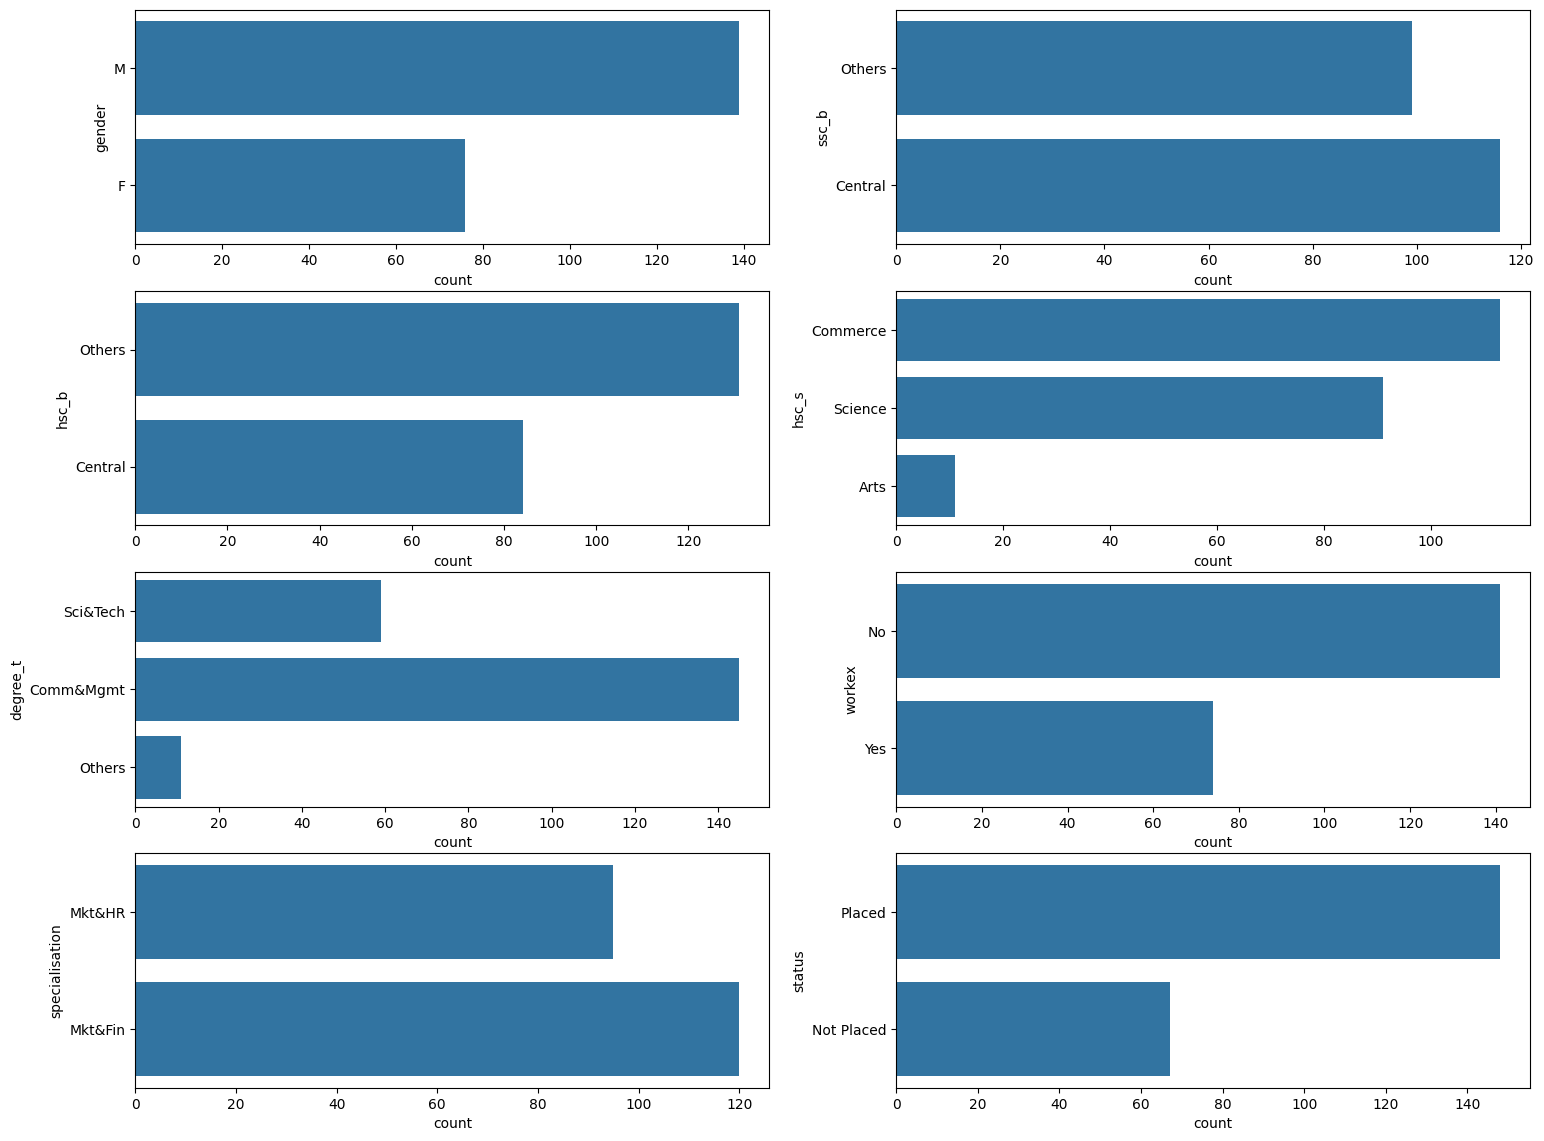

In [115]:
plt.figure(figsize=(18,14))
for i,col in enumerate(cat_feature,start=1):
    plt.subplot(4,2,i)
    sns.countplot(df[col])

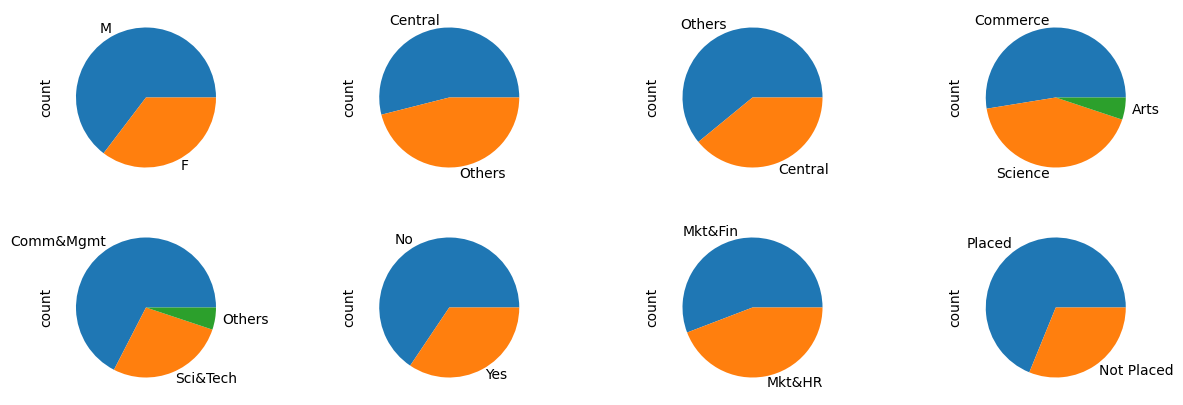

In [116]:
plt.figure(figsize=(15,5))
for i,col in enumerate(cat_feature,start=1):
    plt.subplot(2,4,i)
    df[col].value_counts().plot(kind='pie')

ssc_p
hsc_p
degree_p
etest_p
mba_p
salary


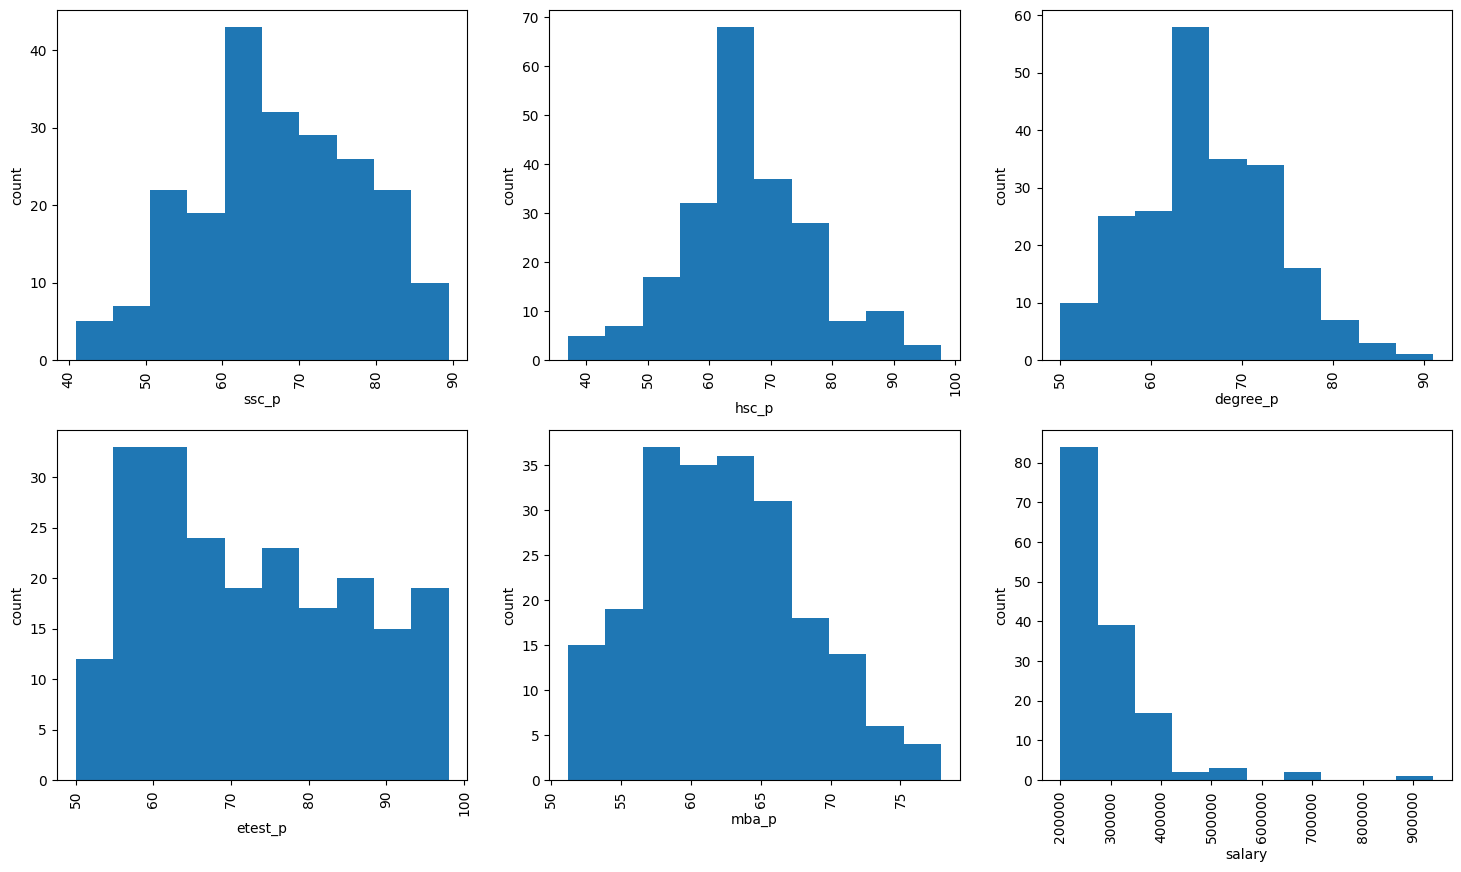

In [134]:
plt.figure(figsize=(18,10))
for i,col in enumerate(num_feature,start=1):
    print(col)
    plt.subplot(2,3,i)
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)

C:\Users\snehu\AppData\Local\Temp\ipykernel_15104\1280555042.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\snehu\AppData\Local\Temp\ipykernel_15104\1280555042.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\snehu\AppData\Local\Temp\ipykernel_15104\12

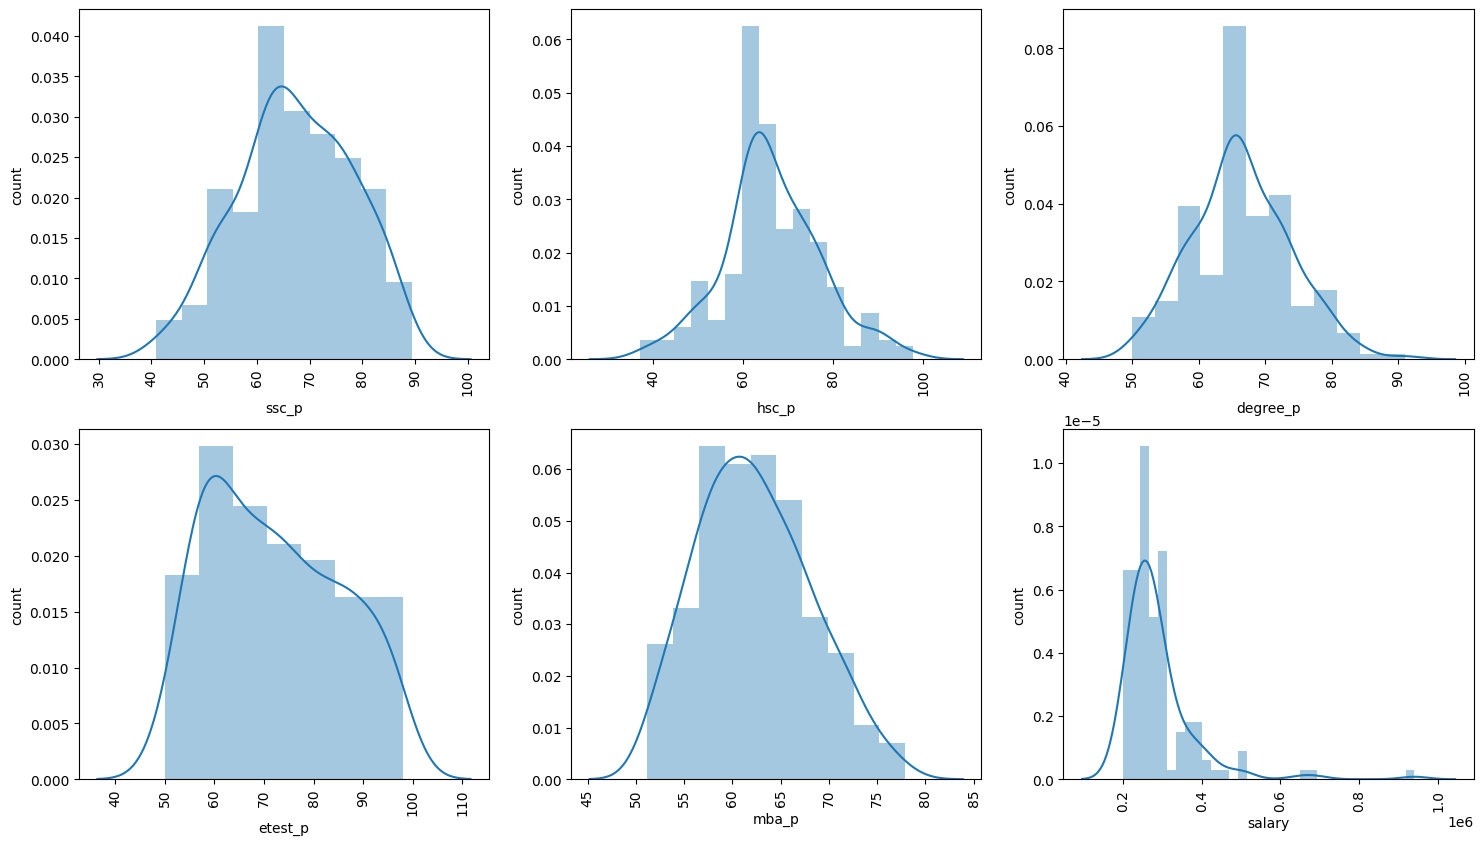

In [136]:
plt.figure(figsize=(18,10))
for i,col in enumerate(num_feature,start=1):
    plt.subplot(2,3,i)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)

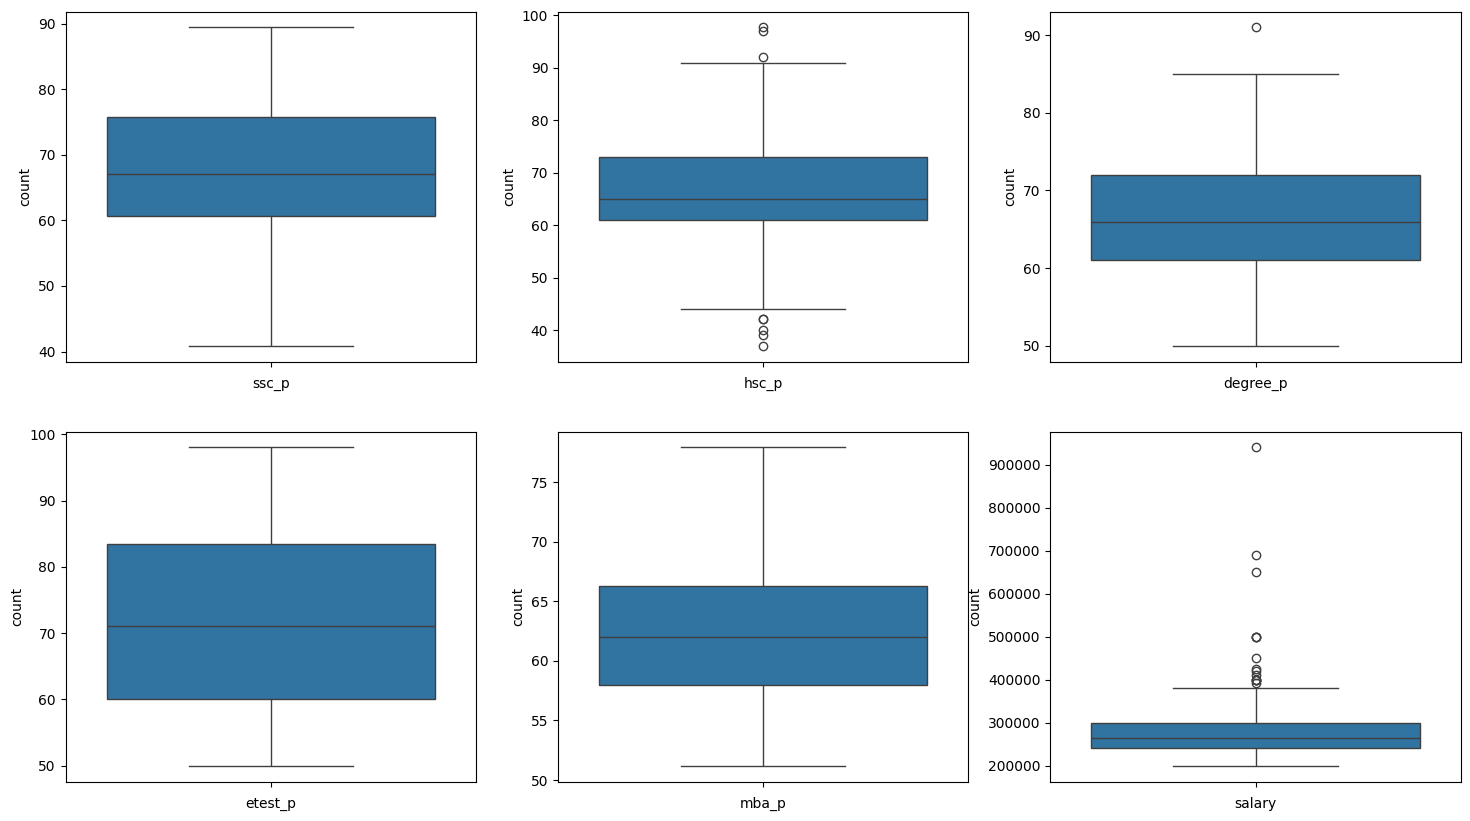

In [137]:
plt.figure(figsize=(18,10))
for i,col in enumerate(num_feature,start=1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)